# Разведывательный анализ данных (EDA)
## Основные цели и задачи проекта:
- Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
- Выявить значимые параметры влияющие, на итоговую оценку.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50)  # выведем больше строк
pd.set_option('display.max_columns', 50)  # выведем больше колонок

## Описание датасета
- 1 school — аббревиатура школы, в которой учится ученик
- 2 sex — пол ученика ('F' - женский, 'M' - мужской)
- 3 age — возраст ученика (от 15 до 22)
- 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
- 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
- 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
- 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- 15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
- 16 schoolsup — дополнительная образовательная поддержка (yes или no)
- 17 famsup — семейная образовательная поддержка (yes или no)
- 18 paid — дополнительные платные занятия по математике (yes или no)
- 19 activities — дополнительные внеучебные занятия (yes или no)
- 20 nursery — посещал детский сад (yes или no)
- 21 higher — хочет получить высшее образование (yes или no)
- 22 internet — наличие интернета дома (yes или no)
- 23 romantic — в романтических отношениях (yes или no)
- 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
- 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- 28 absences — количество пропущенных занятий
- 29 score — баллы по госэкзамену по математике

In [3]:
df = pd.read_csv('stud_math.csv')

## Предварительный анализ

In [4]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

**Выводы**
- Столбец "studytime, granular" не обозначен в описании.
- 13 числовых столбцов, 17 категориальных.

In [6]:
def info(column):
    count = len(df[column])
    empty = df[column].isnull().sum()
    print('Всего значений - {}'.format(count))
    print('Пустых значений - {}'.format(empty))
    print('Пустых значений - {}%'.format(round(empty / count * 100, 2)))

In [7]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [8]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Проверим все столбцы
### score

Этот столбец является целевым для нас, поэтому рассмотрим его первым.

In [9]:
info('score')

Всего значений - 395
Пустых значений - 6
Пустых значений - 1.52%


Очистим датафрэйм от строк, где нет данных о score, т.к. они не интересны для нас

In [10]:
df = df.dropna(subset=['score'])

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

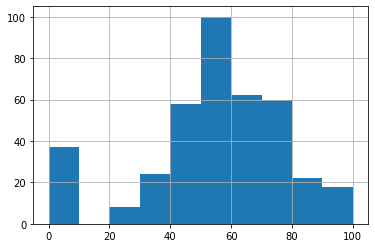

In [11]:
df.score.hist()
df.score.describe()

- Основные значения  между 20 и 100.
- Есть выброс - значение 0. Возможно оценка 0 ставилась при отсутствии студента. От этих значений стоит избавиться.

In [12]:
df = df[df.score != 0]

### school

In [13]:
df.school.value_counts()

GP    311
MS     41
Name: school, dtype: int64

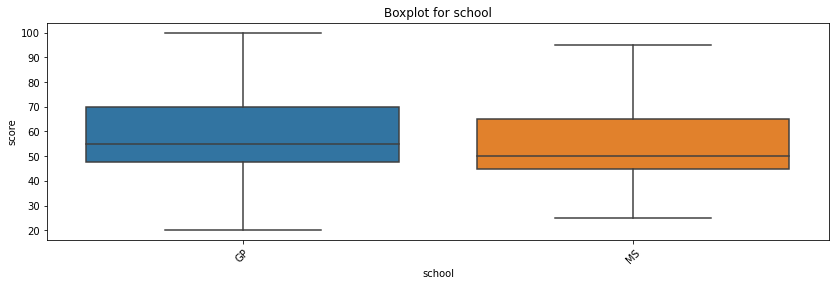

In [14]:
get_boxplot('school')

- В датасете 2 школы: GP, MS
- Пустых значений нет
- В школе GP уровень подготовки выше, чем в MS

### sex

In [15]:
df.sex.value_counts()

F    182
M    170
Name: sex, dtype: int64

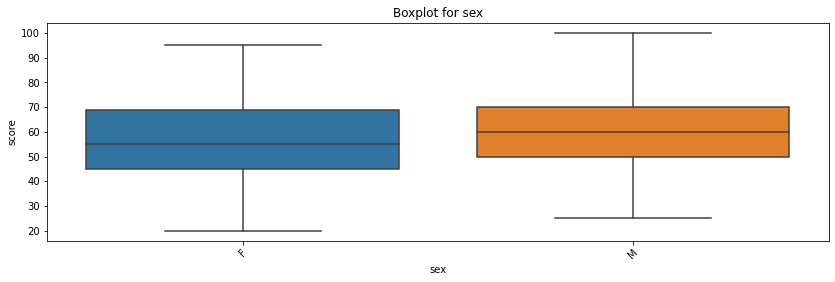

In [16]:
get_boxplot('sex')

- Пустых значений нет.
- M в среднем лучше сдают экзамен по математике.

### age

Всего значений - 352
Пустых значений - 0
Пустых значений - 0.0%


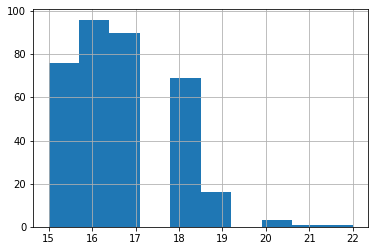

In [17]:
info('age')
df.age.hist()

- Пустых значений нет.
- Значения больше 20 оставляем, т.к. в целях нашего проекта возраст от 15 до 22.

### address

In [18]:
info('address')

Всего значений - 352
Пустых значений - 14
Пустых значений - 3.98%


In [19]:
df.address.value_counts()

U    265
R     73
Name: address, dtype: int64

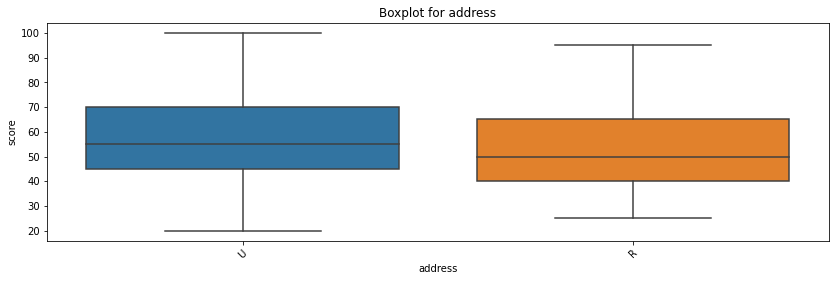

In [20]:
get_boxplot('address')

- Пустых значений - 14 (3.98%)

### famsize

In [21]:
info('famsize')

Всего значений - 352
Пустых значений - 24
Пустых значений - 6.82%


In [22]:
df.famsize.value_counts()

GT3    228
LE3    100
Name: famsize, dtype: int64

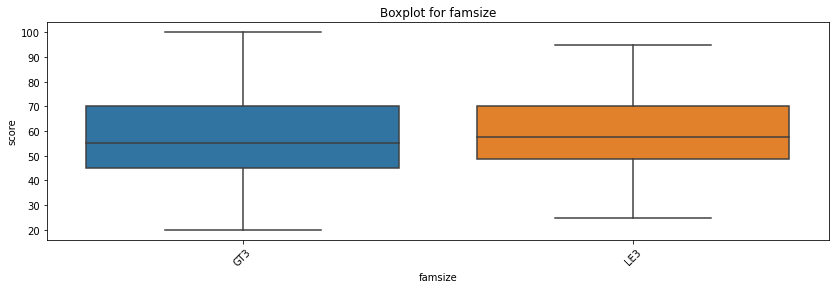

In [23]:
get_boxplot('famsize')

- Пустых значений - 24 (6.82%)

### Pstatus

In [24]:
info('Pstatus')

Всего значений - 352
Пустых значений - 41
Пустых значений - 11.65%


In [25]:
df.Pstatus.value_counts()

T    277
A     34
Name: Pstatus, dtype: int64

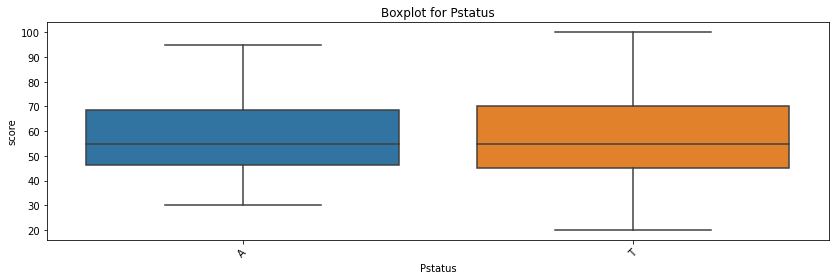

In [26]:
get_boxplot('Pstatus')

- Пустых значений 41 (11.65%)
- Диаграмма показывает, что данный столбец практически не влияет на итоговый результат.

Столбец можно удалить:

In [27]:
df.drop(['Pstatus'], inplace=True, axis=1)

### Medu

In [28]:
info('Medu')

Всего значений - 352
Пустых значений - 2
Пустых значений - 0.57%


In [29]:
df.Medu.value_counts()

4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: Medu, dtype: int64

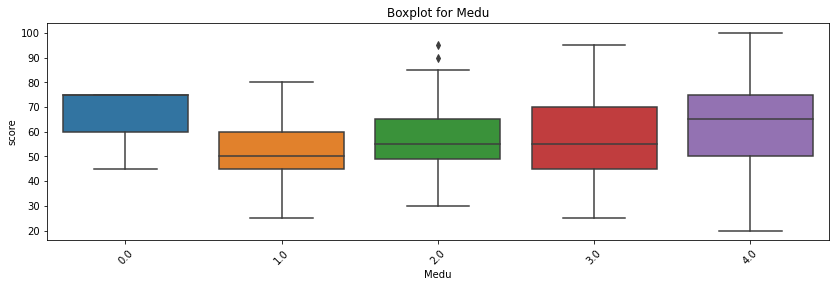

In [30]:
get_boxplot('Medu')

- Пустых значений 2 (0.57%)
- Есть выбросы в значении 2.0

### Fedu

In [31]:
info('Fedu')

Всего значений - 352
Пустых значений - 21
Пустых значений - 5.97%


In [32]:
df.Fedu.value_counts()

2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: Fedu, dtype: int64

Значение 40.0 - ошибка, скорее всего должно быть 4.0

In [33]:
df.at[df[df.Fedu == 40]['Fedu'].index[0], 'Fedu'] = 4
df.Fedu.value_counts()

2.0    94
3.0    89
4.0    81
1.0    65
0.0     2
Name: Fedu, dtype: int64

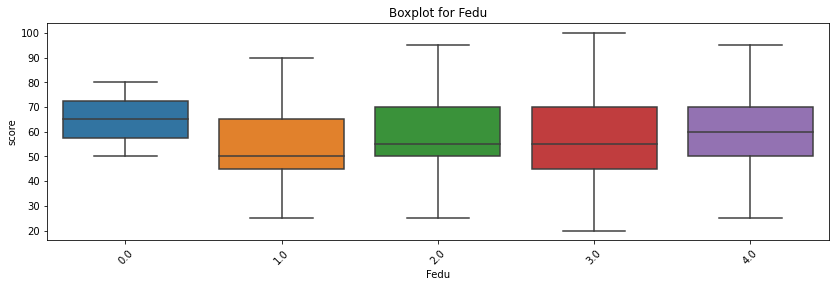

In [34]:
get_boxplot('Fedu')

- Ошибка устранена.
- Пустых значений 21 (5.97%)

### Mjob

In [35]:
info('Mjob')

Всего значений - 352
Пустых значений - 17
Пустых значений - 4.83%


In [36]:
df.Mjob.value_counts()

other       115
services     90
teacher      51
at_home      49
health       30
Name: Mjob, dtype: int64

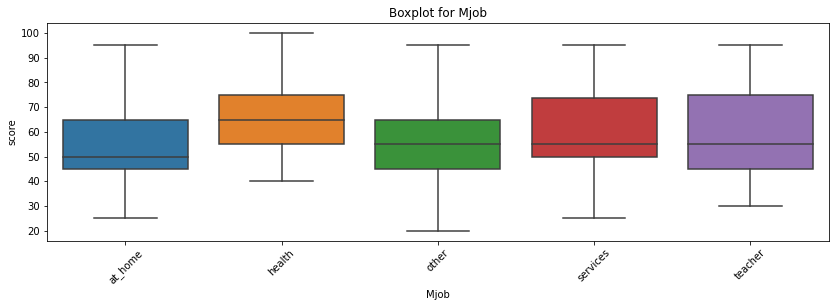

In [37]:
get_boxplot('Mjob')

- Пустых значений 17 (4.83%)
- Уровень сдачи экзамена самый высокий, если сфера работы матери - сфера здравоохранение.

### Fjob

In [38]:
info('Fjob')

Всего значений - 352
Пустых значений - 32
Пустых значений - 9.09%


In [39]:
df.Fjob.value_counts()

other       176
services     89
teacher      26
health       15
at_home      14
Name: Fjob, dtype: int64

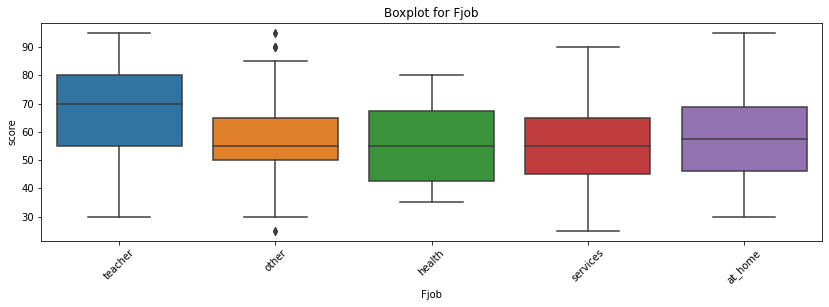

In [40]:
get_boxplot('Fjob')

- Пустых значений 32 (9.09%)
- В значении 'other' есть выбросы.
- Уровень сдачи экзамена самый высокий, если сфера работы отца - учитель.

### reason

In [41]:
info('reason')

Всего значений - 352
Пустых значений - 15
Пустых значений - 4.26%


In [42]:
df.reason.value_counts()

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

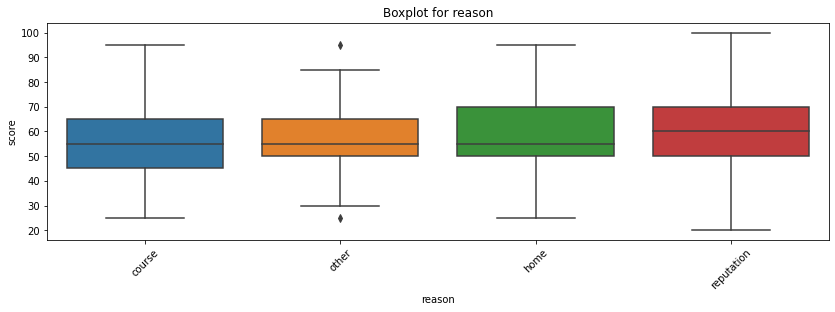

In [43]:
get_boxplot('reason')

- Пустых значений 15 (4.26%)
- Есть выбросы в значение 'other'.

### guardian

In [44]:
info('guardian')

Всего значений - 352
Пустых значений - 29
Пустых значений - 8.24%


In [45]:
df.guardian.value_counts()

mother    225
father     78
other      20
Name: guardian, dtype: int64

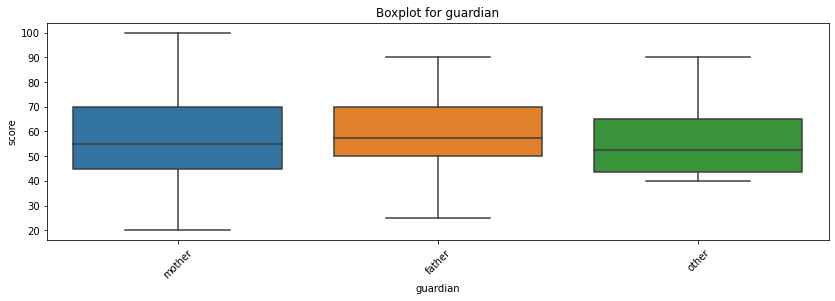

In [46]:
get_boxplot('guardian')

- Пустых значений 29 (8.24%)
- Если опекун отец, то уровень сдачи экзамена выше.

### traveltime

In [47]:
info('traveltime')

Всего значений - 352
Пустых значений - 23
Пустых значений - 6.53%


In [48]:
df.traveltime.value_counts()

1.0    219
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

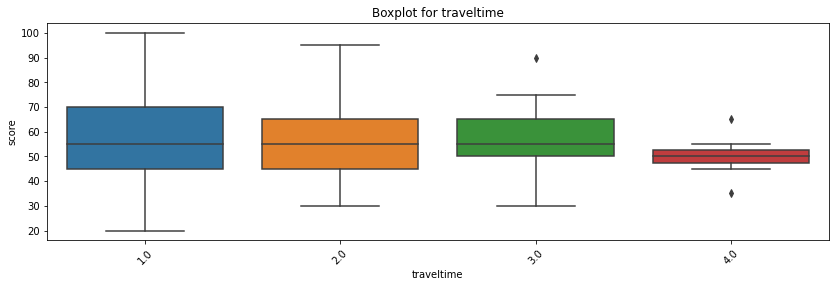

In [49]:
get_boxplot('traveltime')

- Пустых значений 23 (6.53%)
- Диаграмма показывает отсутствие значимого влияния данного параметра на итоговый результат.

Столбец можно удалить из анализа:

In [50]:
df.drop(['traveltime'], inplace=True, axis=1)

### studytime

In [51]:
info('studytime')

Всего значений - 352
Пустых значений - 7
Пустых значений - 1.99%


In [52]:
df.studytime.value_counts()

2.0    173
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64

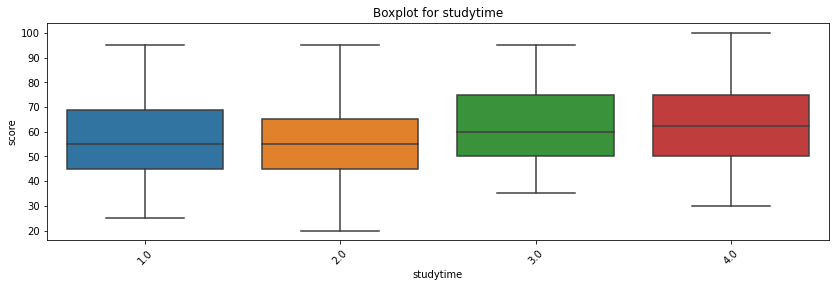

In [53]:
get_boxplot('studytime')

- Пустых значений 7 (1.99%)

### failures

In [54]:
info('failures')

Всего значений - 352
Пустых значений - 20
Пустых значений - 5.68%


In [55]:
df.failures.value_counts()

0.0    273
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

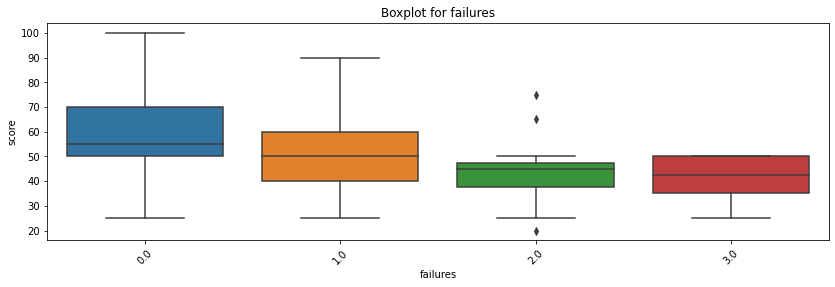

In [56]:
get_boxplot('failures')

- Пустых значений 20 (5.68%)
- Количество пустых значений превышает количество значений в двух заполненных признаках.

Столбец можно удалить:

In [57]:
df.drop(['failures'], inplace=True, axis=1)

### schoolsup

In [58]:
info('schoolsup')

Всего значений - 352
Пустых значений - 9
Пустых значений - 2.56%


In [59]:
df.schoolsup.value_counts()

no     295
yes     48
Name: schoolsup, dtype: int64

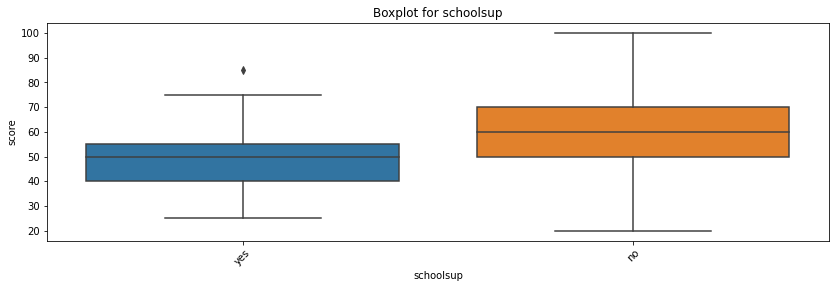

In [60]:
get_boxplot('schoolsup')

- Пустых значений 9 (2.56%)
- Без дополнительной образовательной поддержки результат лучше.

### famsup

In [61]:
info('famsup')

Всего значений - 352
Пустых значений - 36
Пустых значений - 10.23%


In [62]:
df.famsup.value_counts()

yes    196
no     120
Name: famsup, dtype: int64

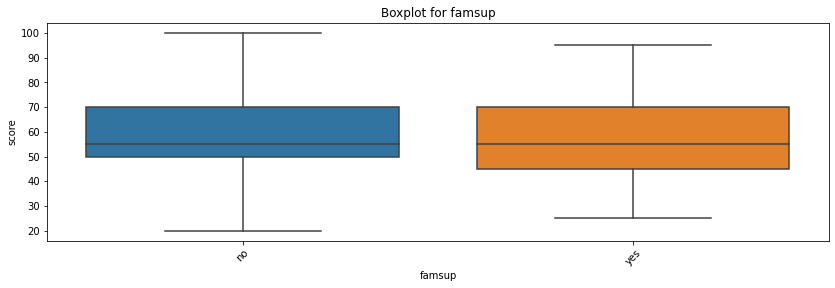

In [63]:
get_boxplot('famsup')

- Пустых значений 36 (10.23%)
- Судя по графикам, семейная образовательная поддержка значимого влияния на результат не оказывает.

Столбец можно удалить:

In [64]:
df.drop(['famsup'], inplace=True, axis=1)

### paid

In [65]:
info('paid')

Всего значений - 352
Пустых значений - 36
Пустых значений - 10.23%


In [66]:
df.paid.value_counts()

no     170
yes    146
Name: paid, dtype: int64

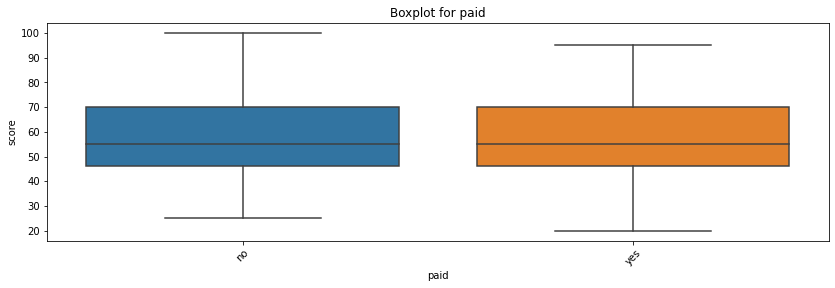

In [67]:
get_boxplot('paid')

- Пустых значений 36 (10.23%)
- Судя по графикам, дополнительные платные занятия значимого влияния на результат не оказывает.

Столбец можно удалить:

In [68]:
df.drop(['paid'], inplace=True, axis=1)

### activities

In [69]:
info('activities')

Всего значений - 352
Пустых значений - 12
Пустых значений - 3.41%


In [70]:
df.activities.value_counts()

yes    172
no     168
Name: activities, dtype: int64

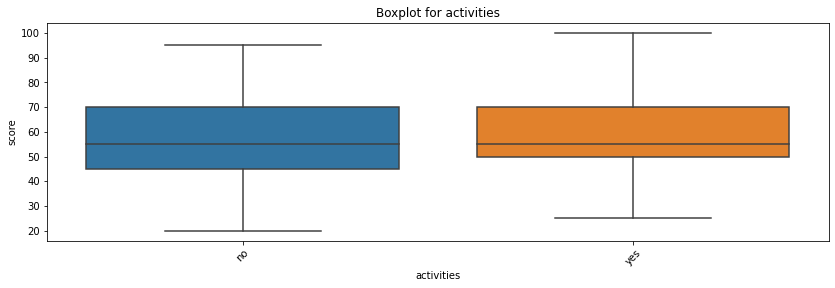

In [71]:
get_boxplot('activities')

- Пустых значений 12 (3.41%)

### nursery

In [72]:
info('nursery')

Всего значений - 352
Пустых значений - 12
Пустых значений - 3.41%


In [73]:
df.nursery.value_counts()

yes    272
no      68
Name: nursery, dtype: int64

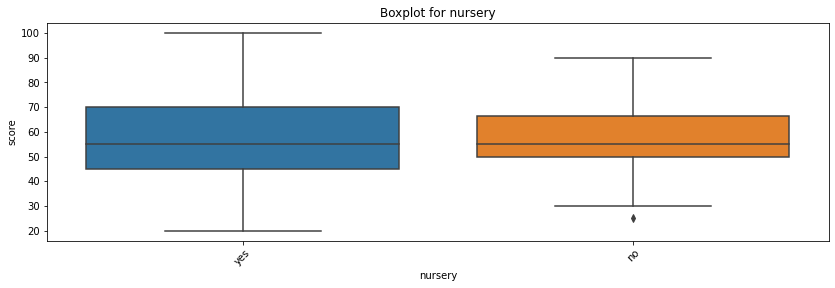

In [74]:
get_boxplot('nursery')

- Пустых значений 12 (3.41%)

### Неописанный столбец 'studytime, granular'

Исходя из названия можно предположить, что он коррелирует со столбцом 'studytime'

In [75]:
df[['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


- 100% корреляция, столбец можно удалить.

In [76]:
df.drop(['studytime, granular'], inplace=True, axis=1)

### higher

In [77]:
info('higher')

Всего значений - 352
Пустых значений - 19
Пустых значений - 5.4%


In [78]:
df.higher.value_counts()

yes    320
no      13
Name: higher, dtype: int64

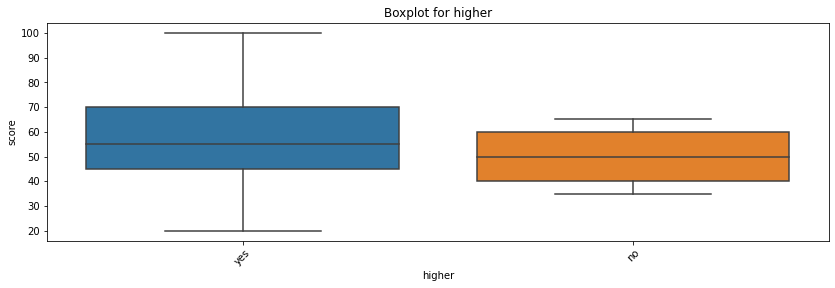

In [79]:
get_boxplot('higher')

- Пустых значений 19 (5.4%)
- Незаполненных значений больше, чем одного из параметров.

Столбец можно удалить:

In [80]:
df.drop(['higher'], inplace=True, axis=1)

### internet

In [81]:
info('internet')

Всего значений - 352
Пустых значений - 29
Пустых значений - 8.24%


In [82]:
df.internet.value_counts()

yes    274
no      49
Name: internet, dtype: int64

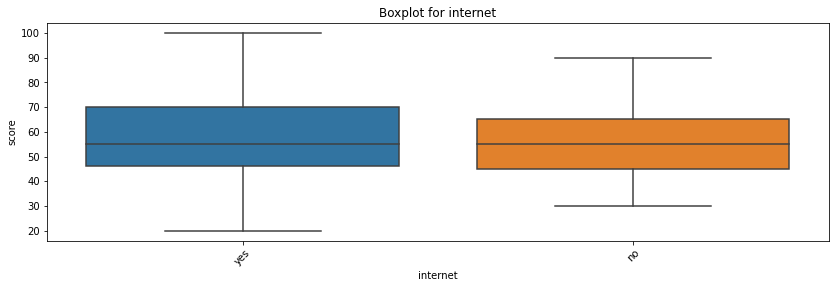

In [83]:
get_boxplot('internet')

- Пустых значений 29 (8.24%)
- Уровень сдачи экзамена у тех, у кого есть интернет выше.

### romantic 

In [84]:
info('romantic')

Всего значений - 352
Пустых значений - 29
Пустых значений - 8.24%


In [85]:
df.romantic.value_counts()

no     219
yes    104
Name: romantic, dtype: int64

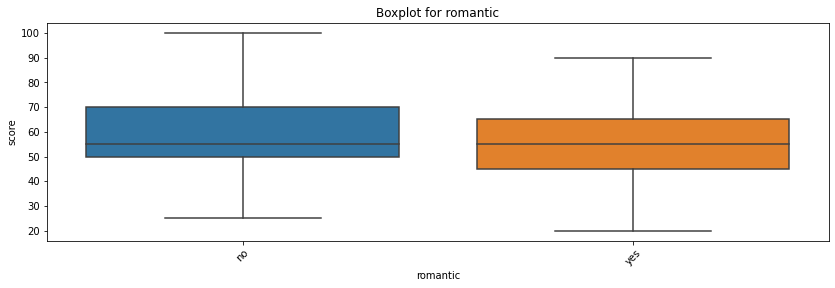

In [86]:
get_boxplot('romantic')

- Пустых значений 29 (8.24%)
- Общий уровень оценки выше у тех, у кого нет романтических отношений.

### famrel

In [87]:
info('famrel')

Всего значений - 352
Пустых значений - 24
Пустых значений - 6.82%


count    328.000000
mean       3.942073
std        0.921871
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

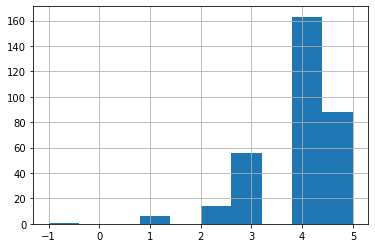

In [88]:
df.famrel.hist()
df.famrel.describe()

Есть выброс - значение -1. Скорее всего должно быть значение 1.


In [89]:
df.at[df[df.famrel == -1]['famrel'].index[0], 'famrel'] = 1

- Пустых значений 24 (6.82%)
- Основные значения от 3 до 5.

### freetime

In [90]:
info('freetime')

Всего значений - 352
Пустых значений - 8
Пустых значений - 2.27%


count    344.000000
mean       3.235465
std        1.004258
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

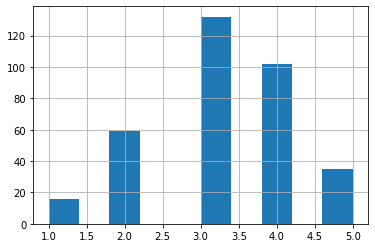

In [91]:
df.freetime.hist()
df.freetime.describe()

- Пустых значений 8 (2.27%)

### goout

In [92]:
info('goout')

Всего значений - 352
Пустых значений - 6
Пустых значений - 1.7%


count    346.000000
mean       3.086705
std        1.091998
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

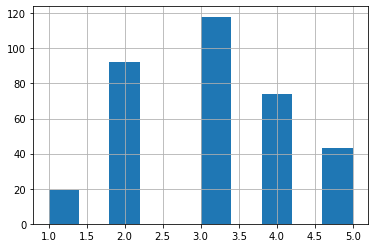

In [93]:
df.goout.hist()
df.goout.describe()

- Пустых значений 6 (1.7%)

### health

In [94]:
info('health')

Всего значений - 352
Пустых значений - 13
Пустых значений - 3.69%


count    339.000000
mean       3.516224
std        1.412812
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

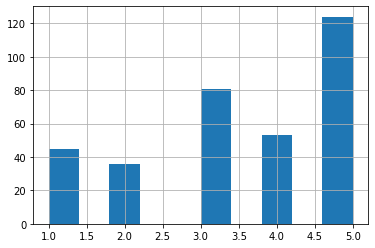

In [95]:
df.health.hist()
df.health.describe()

- Пустых значений 13 (3.69%)

### absences

In [96]:
info('absences')

Всего значений - 352
Пустых значений - 10
Пустых значений - 2.84%


count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

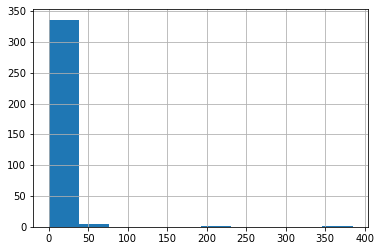

In [97]:
df.absences.hist()
df.absences.describe()

- Пустых значений 10 (2.84%)
- Есть выбросы.

Отфильтруем значения выше perc75 + 1.5*IQR

count    315.000000
mean       4.682540
std        4.423538
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       17.000000
Name: absences, dtype: float64

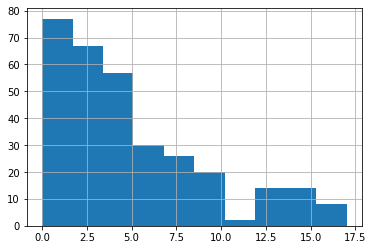

In [98]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
df = df.loc[df.absences <= perc75 + 1.5*IQR]

df.absences.hist()
df.absences.describe()

## Посмотрим корреляцию числовых столбцов

In [99]:
df.corr()

,age,Medu,Fedu,studytime,famrel,freetime,goout,health,absences,score
age,1.000000,-0.134782,-0.144266,0.007182,0.064407,0.028367,0.145567,-0.032440,0.193170,-0.139604
Medu,-0.134782,1.000000,0.606673,0.083409,-0.006555,0.033591,0.043716,-0.047855,0.088397,0.187063
Fedu,-0.144266,0.606673,1.000000,-0.018339,-0.013625,-0.002948,-0.004630,0.009119,-0.019621,0.133839
studytime,0.007182,0.083409,-0.018339,1.000000,0.056691,-0.136735,-0.016835,-0.095292,-0.054918,0.143721
famrel,0.064407,-0.006555,-0.013625,0.056691,1.000000,0.171011,0.044349,0.105616,-0.108107,0.074065
freetime,0.028367,0.033591,-0.002948,-0.136735,0.171011,1.000000,0.294462,0.052288,0.086308,-0.010754
goout,0.145567,0.043716,-0.004630,-0.016835,0.044349,0.294462,1.000000,0.014037,0.167828,-0.200476
health,-0.032440,-0.047855,0.009119,-0.095292,0.105616,0.052288,0.014037,1.000000,-0.033991,-0.054884
absences,0.193170,0.088397,-0.019621,-0.054918,-0.108107,0.086308,0.167828,-0.033991,1.000000,-0.229627
score,-0.139604,0.187063,0.133839,0.143721,0.074065,-0.010754,-0.200476,-0.054884,-0.229627,1.000000


Средний уровень корреляции с оценкой за экзамен наблюдается у следующих параметров:
- age (отрицательная)
- Medu 
- Fedu
- studytime
- goout (отрицательная)

## Протестируем все столбцы, как категориальные признаки

In [100]:
for col in df.columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки score



Найдены статистически значимые различия для колонок:
sex, address, Medu, Fedu, Mjob, studytime, schoolsup, goout

Добавим колонку age, т.к. всё же она является статистически важным параметром по моему мнению.

## Сформируем итоговый дата фрейм для модели



In [101]:
df_for_model = df.loc[:, ['sex', 'age', 'address', 'Medu', 'Fedu',
                          'Mjob', 'studytime', 'schoolsup', 'goout',]]

df_for_model.head(10)

,sex,age,address,Medu,Fedu,Mjob,studytime,schoolsup,goout
0,F,18,U,4.0,4.0,at_home,2.0,yes,4.0
1,F,17,U,1.0,1.0,at_home,2.0,no,3.0
2,F,15,U,1.0,1.0,at_home,2.0,yes,2.0
3,F,15,U,4.0,2.0,health,3.0,no,2.0
4,F,16,U,3.0,3.0,other,2.0,no,2.0
5,M,16,U,4.0,3.0,services,2.0,no,2.0
6,M,16,NaN,2.0,2.0,other,2.0,no,4.0
7,F,17,U,4.0,4.0,other,2.0,yes,4.0
8,M,15,U,3.0,2.0,services,2.0,no,2.0
9,M,15,U,3.0,4.0,other,2.0,no,1.0
